In [3]:
library(data.table)
library(ggplot2)

# Common Cause (Fork) 

![common_cause.PNG](https://cdn.hashnode.com/res/hashnode/image/upload/v1640723133141/IncUS9zVxY.png)

In [167]:
age_of_child = sample(7:10, size = 1000, replace = TRUE, prob = c(1/5, 1/4, 1/3, 1/2))

In [168]:
table(age_of_child)

age_of_child
  7   8   9  10 
142 178 278 402 

In [205]:
n <- 1000 # number of data points
ages <- 7:10
prob_ages <- c(1/5, 1/4, 1/3, 1/2)

age_of_child = sample(ages, size = n, replace = TRUE, prob = prob_ages)

speed_of_kicked_ball <- rnorm(n, mean= age_of_child, sd=1)

reading_ability <- rnorm(n, mean= 3*age_of_child + 5, sd=1)

In [200]:
dt <- data.table(speed_of_kicked_ball, reading_ability,
            age_of_child = factor(paste0("age_of_child= ",age_of_child)))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



[1] 0.7194862

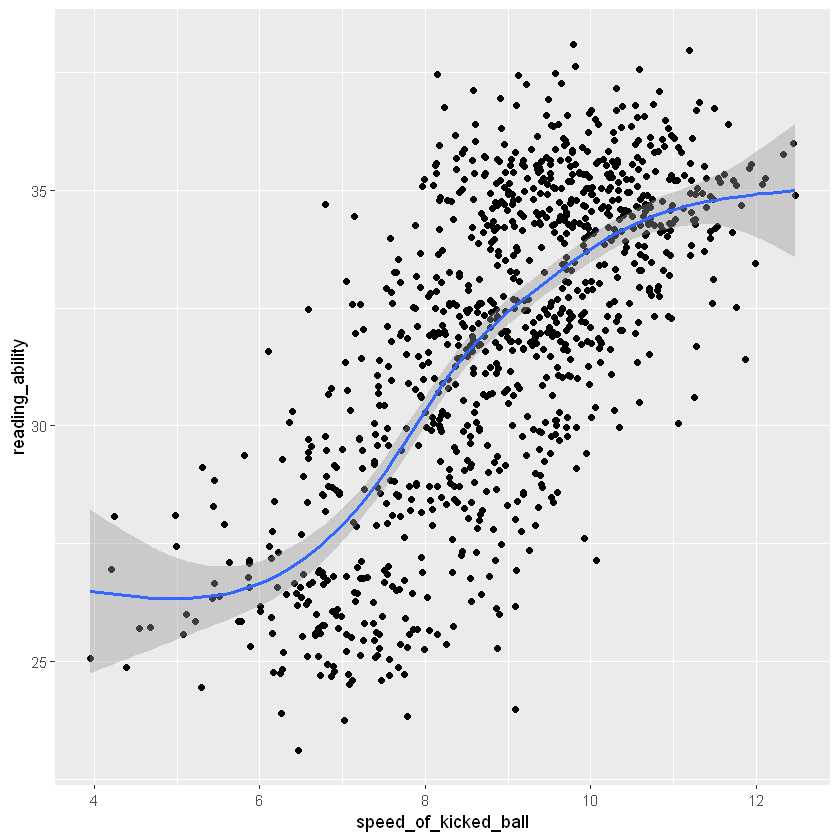

In [208]:
# You can pick different formulae in geom_smooth
ggplot(dt, aes(x=speed_of_kicked_ball, y=reading_ability)) + geom_point() + geom_smooth()
cor(speed_of_kicked_ball, reading_ability)

In [202]:
cor(speed_of_kicked_ball, reading_ability)

[1] 0.6971887

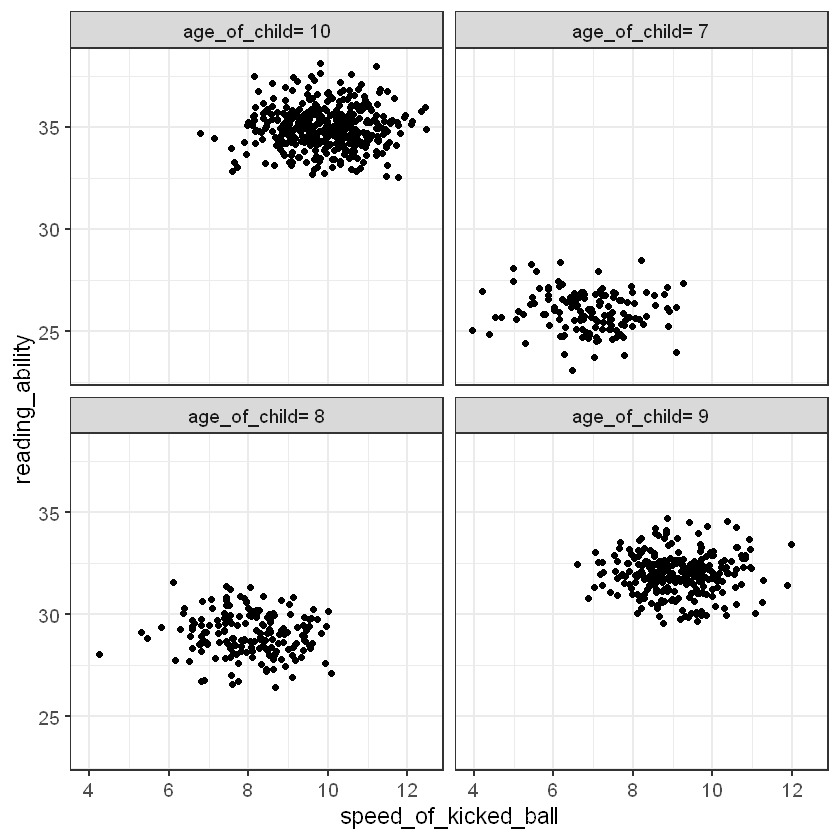

In [203]:
ggplot(dt, aes(x=speed_of_kicked_ball, y=reading_ability)) + geom_point() + facet_wrap(~age_of_child) + theme_bw(base_size = 14)

In [204]:
dt[, .(correlation=cor(x=speed_of_kicked_ball, y=reading_ability)), by=age_of_child]


age_of_child,correlation
<fct>,<dbl>
age_of_child= 10,0.003362451
age_of_child= 8,-0.069064143
age_of_child= 9,-0.006078615
age_of_child= 7,-0.078281148


# Indirect Association (Chain)

![chain.PNG](https://cdn.hashnode.com/res/hashnode/image/upload/v1640730789038/bMk37ohp6.png)


In [229]:
n <- 1000

motivation_level <- rbinom(n, size=1, prob=0.7)

gym<- rbinom(n, size=motivation_level, prob=0.5) 

weight_avg <- rnorm(n, mean= gym*5 , sd=1)


dt <- data.table(motivation_level = factor(motivation_level),weight_avg, gym =paste0("went to gym = ",factor(gym)))

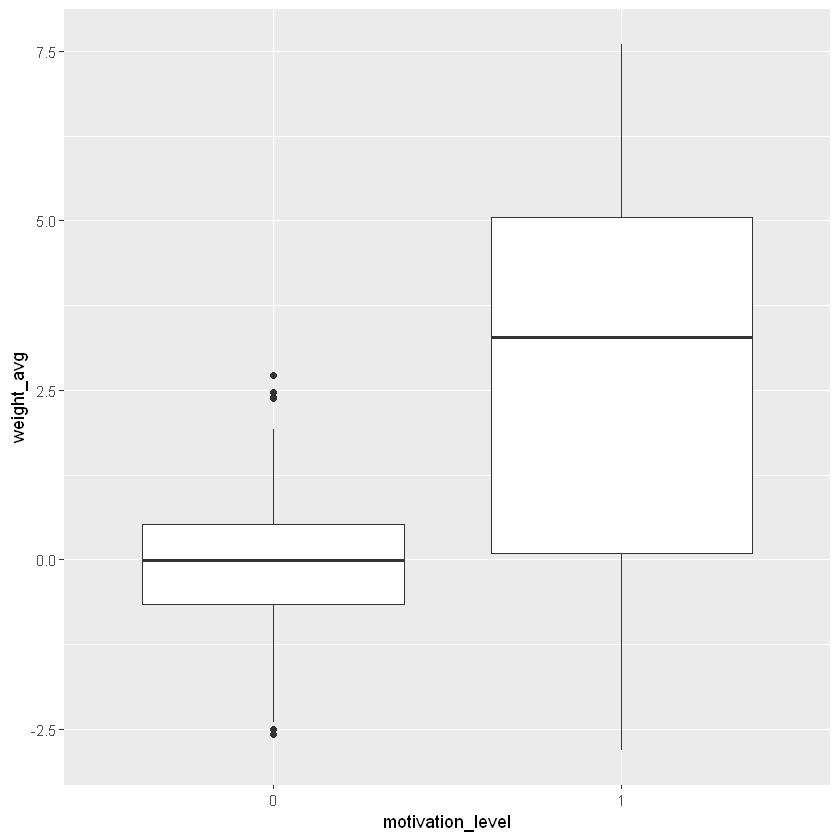

In [230]:
ggplot(dt, aes(x=motivation_level, y=weight_avg)) + geom_boxplot()

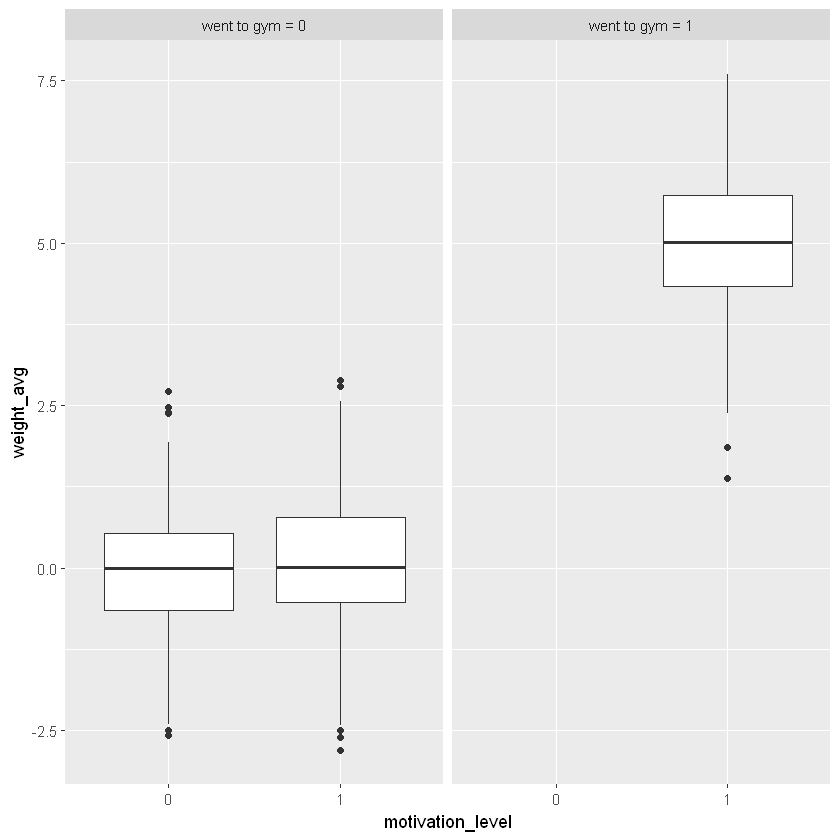

In [231]:
ggplot(dt, aes(x=motivation_level, y=weight_avg)) + geom_boxplot()  + facet_wrap(~gym)

# Common Consequence (Collider)
![collider.PNG](https://cdn.hashnode.com/res/hashnode/image/upload/v1640826865696/raEt4aMjC.png)


In [7]:
n <- 1000
x <- rnorm(n)  # good at managment
y <- rnorm(n)  # good at IT
z <- x+y > 1  

dt <- data.table(x, y, z)


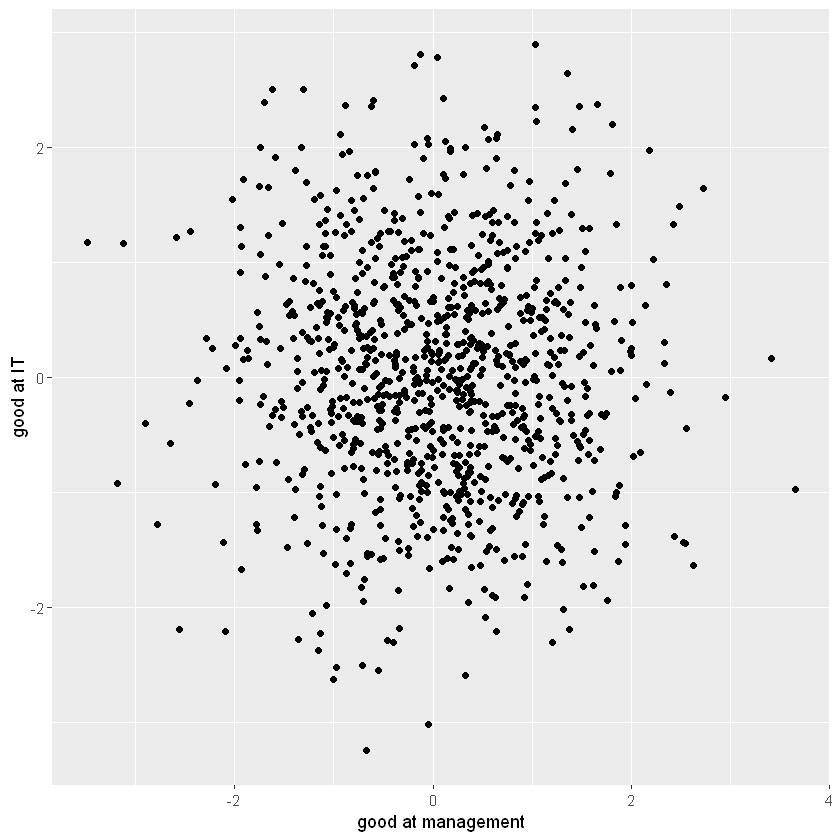

In [8]:
ggplot(dt, aes(x=x, y=y)) + geom_point() + labs(x = 'good at management', y = 'good at IT')


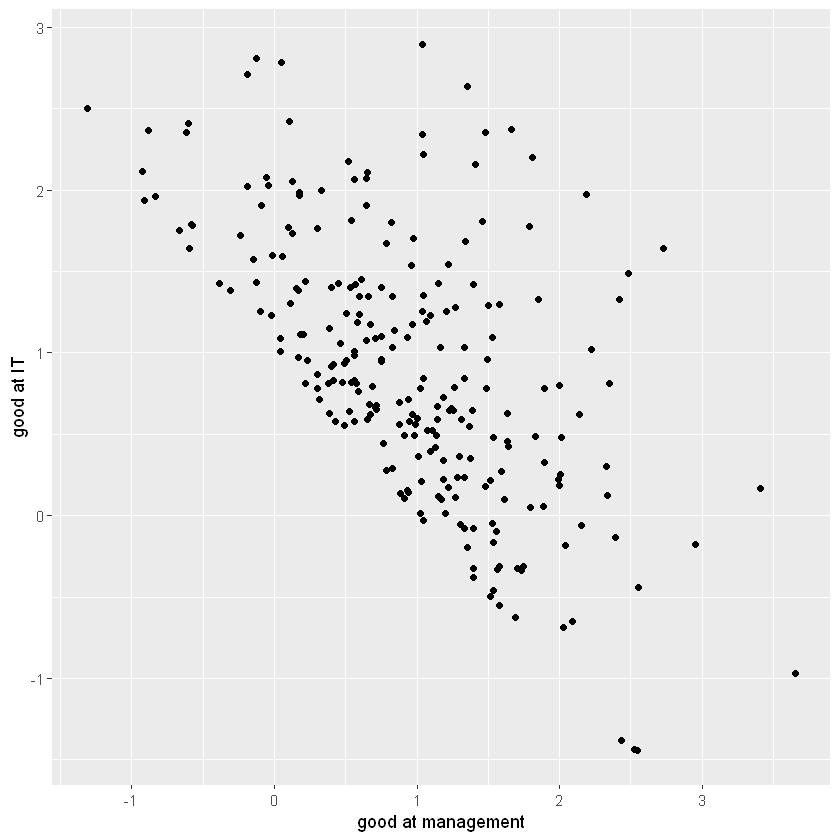

In [9]:
ggplot(dt[z == TRUE], aes(x=x, y=y)) + geom_point() + labs(x = 'good at management', y = 'good at IT')